Script Used to find point of inflection in Ecoregions and determine what HIT metric affects the ecoregion the most

In [1]:
import pandas as pd
import numpy as np
# Decision Tree Regressor
import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')

Upload excel file from Edited_MultiOutput.ipynb

In [2]:
df = pd.read_excel("Metric_Runs_V2.xlsx")

In [3]:
grouped = df.groupby("Ecoregion")
keys = grouped.groups.keys() #create a dictionary list of the each group unique varibles in the specifed column of the dataframe.   
for key in keys: #looping through each key 
        splitdf = grouped.get_group(key) # creating a temporary dataframe with only the values of the current key. 
        splitdf.to_excel(f"Ecoregion_{str(key)}_Metric_Runs.xlsx")

Calculation of point of inflection in all Ecoregions

Ecoregion 1 points of inflection [10 32 35 36]
Ecoregion 2 points of inflection [10 26 28]
Ecoregion 3 points of inflection [ 8 26 28]
Ecoregion 4 points of inflection [ 9 25 27 29 31 33]
Ecoregion 5 points of inflection [ 9 29 31 33]
Ecoregion 6 points of inflection [ 7 22 23]
Ecoregion 7 points of inflection [ 9 27 30 32]
Ecoregion 8 points of inflection [ 8 28]
Ecoregion 9 points of inflection [ 4 11 13]
Ecoregion 10 points of inflection [ 6 18 20]


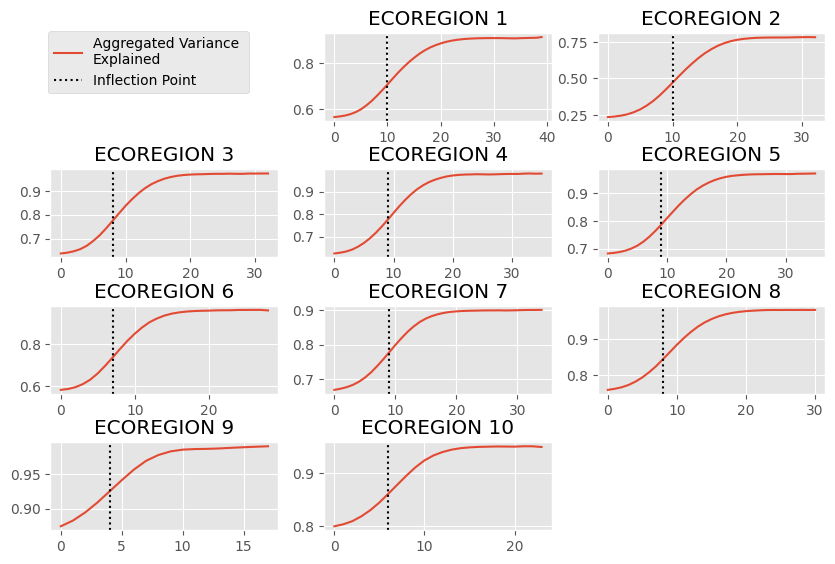

In [4]:
import glob

plt.figure(figsize=(10, 10))
plt.subplots_adjust(hspace=0.55)

Ecoregion_dfs = sorted(glob.glob("*_Metric_Runs.xlsx"))

for i,regions in enumerate(Ecoregion_dfs):
    i +=1 

    # add a new subplot iteratively
    ax = plt.subplot(6, 3, i + 1)

    df_ecoregion1 = pd.read_excel(f"Ecoregion_{i}_Metric_Runs.xlsx")
    # # # Remove three columns as index base
    df_ecoregion1.drop(df_ecoregion1.columns[[0,1]], axis=1, inplace=True)
    # print(df_ecoregion1)

    # loop through the rows 
    grouped = df_ecoregion1.groupby("Run")['Importance'].agg('mean')
    
    # Convert df to excel file for each ecoregion separately
    grouped.to_excel(f"grouped_Ecoregion{i}.xlsx")

    # Read Excel file and convert to numpy arrays
    Ecoregion = pd.read_excel(f"grouped_Ecoregion{i}.xlsx")
    grouped_numpy = Ecoregion.to_numpy()
    x_ecoregion = grouped_numpy[:,0]
    y_ecoregion = grouped_numpy[:,1]

    #################################
    ### find points of inflection ###
    #################################
  
    # compute second derivative switching points
    p_d2 = np.gradient(np.gradient(y_ecoregion))
    # plt.plot(p_d2 / np.max(p_d2), label='Second Derivative (scaled)')
    
    # find switching points
    infls = np.where(np.diff(np.sign(p_d2)))[0]
    print(f"Ecoregion {i} points of inflection {infls}")
    # First point of inflection will tell us what tree depth will be the most important    
    
    # Plot values
    col = (np.random.random(), np.random.random(), np.random.random())
    labels = "Aggregated Variance \nExplained"
    
    grouped.plot(label = labels,ax=ax)

    # chart formatting
    name = f"Ecoregion {i}"
    ax.set_title(name.upper())
    ax.set_xlabel("")

    for j, infl in enumerate(infls, 1):
        if j == 1:
            plt.axvline(x=infl, color='k', label=f'Inflection Point',linestyle =":")
plt.legend(bbox_to_anchor=(-.3, 5.75))


In [ ]:
### Above values will be used to 

Compare all 10 ecoregions in one graph

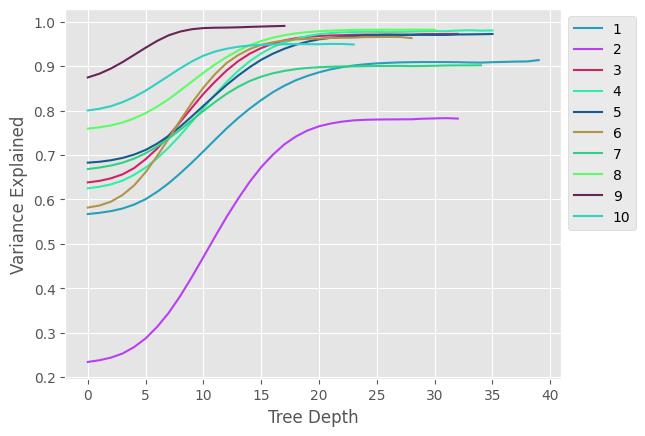

In [21]:

import glob
Ecoregion_dfs = sorted(glob.glob("*_Metric_Runs.xlsx"))
for i, ecoregions in enumerate(Ecoregion_dfs):
    i +=1 
    df_ecoregion = pd.read_excel(f"Ecoregion_{i}_Metric_Runs.xlsx")
    # # # Remove three columns as index base
    df_ecoregion.drop(df_ecoregion.columns[[0,1]], axis=1, inplace=True)

    
    # loop through the rows 
    grouped = df_ecoregion.groupby("Run")['Importance'].agg('mean') # Calculates the mean for all 171 metrics
    grouped.to_excel(f"grouped_Ecoregion_{i}.xlsx")
    # #define random color
    col = (np.random.random(), np.random.random(), np.random.random())
    plt.plot(grouped, label = f"{i}", color = col)
    
    for group in (grouped):
        plt.plot()
        plt.legend(loc='best')
        plt.xlabel ('Tree Depth')
        plt.ylabel ('Variance Explained')
    plt.legend(bbox_to_anchor=(1, 1.0))  

    
    # plt.show(grouped = df_ecoregion.groupby("Run")['Importance'].agg('mean'))

Ecoregion 4 example comparing 171 HIT metrics

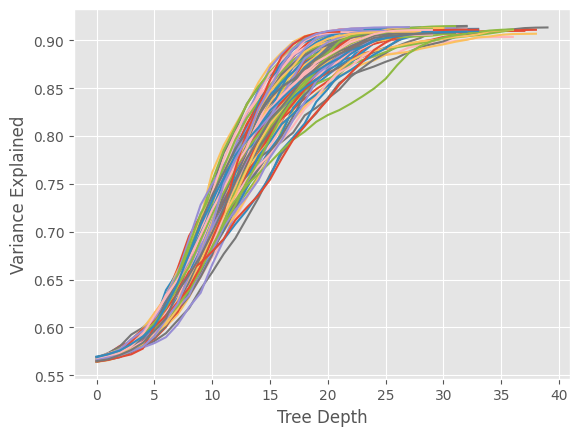

In [ ]:

df_ecoregion1 = pd.read_excel("Ecoregion_4_Metric_Runs.xlsx")
# # # Remove three columns as index base
df_ecoregion1.drop(df_ecoregion1.columns[[0,1]], axis=1, inplace=True)
# print(df_ecoregion1)

# loop through the rows 
grouped = df_ecoregion1.groupby("Metric")

for name, group in grouped:
    plt.xlabel ('Tree Depth')
    plt.ylabel ('Variance Explained')
    plt.plot(group["Run"], group["Importance"]) 


Find highest R2 value in Ecoregion 4, Metric and Metric importance

In [7]:
# Highest R2 Importance Per Run 
idx = df_ecoregion1.groupby('Metric')['Importance'].idxmax()
max_scores = df_ecoregion1.loc[idx]
#Maximum Score 
Maximum_Score = max_scores['Importance'].max()
# Maximum Score Metric
Row_value = df_ecoregion1.loc[df_ecoregion1['Importance'] == Maximum_Score]
print(Row_value)

# Mean R2 Obtained
print(max_scores.mean())

      Ecoregion Metric  Run  Importance
1535          4    mh1   29    0.983604
Ecoregion      4.000000
Run           24.153846
Importance     0.981304
dtype: float64


C:\Users\Jay_Oliver\AppData\Local\Temp\ipykernel_8340\2136701064.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(max_scores.mean())
